f(0) = 0.5
f(1) = 0.125001
f(2) = 0.0546884375
f(3) = 0.025849333496123048
f(4) = 0.012591085651631376
f(5) = 0.006216781402415155


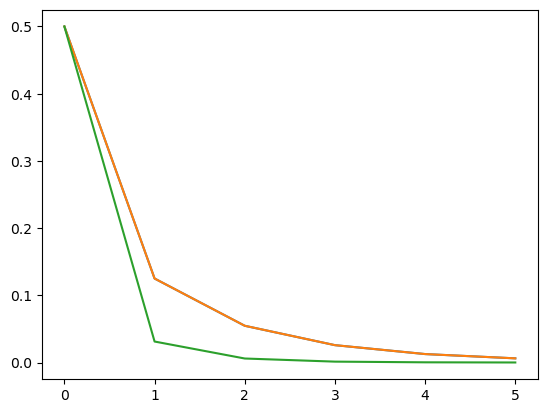

In [20]:
from matplotlib import pyplot as plt
import numpy as np

# Define the recursive function
def compute_f(n, f_values, epsilon=1e-6):
    # We assume f_values has at least one value, f(1), to start with.
    for k in range(1, n+1):
        # Compute the product (1 - f(0)) * ... * (1 - f(k-1))
        product = np.prod([1 - f_values[i] for i in range(k)])
        
        # Prevent the product from becoming too small by adding a small epsilon
        f_k = (product / 2**k) * f_values[k] + epsilon
        
        # Apply clamping to restrict the value between 0 and 1
        f_values[k] = np.clip(f_k, 0, 1)
    
    return f_values

# Initialize the values of f(0), f(1), ..., f(n) to 0.5
n = 5  # Number of terms (can be adjusted)
f_values = np.full(n+1, 0.5)  # Array to store f(0), f(1), ..., f(n), initialized to 0.5

# Call the function to compute the sequence
f_values = compute_f(n, f_values)

# Print the computed values
for k in range(n+1):
    print(f"f({k}) = {f_values[k]}")

plt.plot(np.arange(n+1), f_values)

probs = []
for k in range(n+1):
    product = np.prod([1 - f_values[i] for i in range(k)])
    probs.append((product / 2**k) * f_values[k] + 1e-6)

plt.plot(np.arange(n+1), f_values)
plt.plot(np.arange(n+1), probs)

f(0) = 0.10081418068425328
f(1) = 0.22423436517487147
f(2) = 0.5780982170606843
f(3) = 2.740439791626074
[0.10081418068425328, 0.10081418068425657, 0.10081418068416975, 0.10081418068447656]


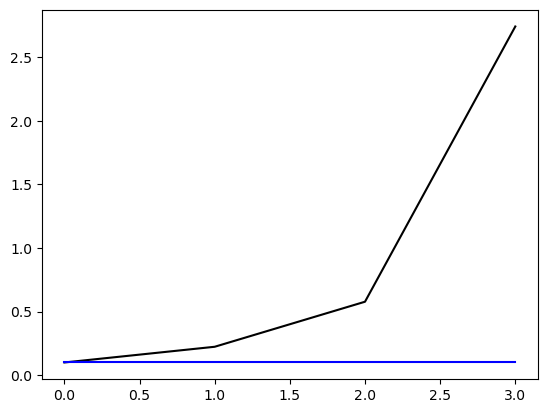

In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def system_of_equations(f_values):
    n = len(f_values) - 1
    equations = []
    
    # Ensure the values stay between 0 and 1 during the calculation
    # f_values = np.clip(f_values, 0, 1)

    equations.append(2*f_values[0] / (1-f_values[0]) - f_values[1])
    # equations.append(f_values[0] - 0.5)

    # Equation for f(1) to f(n)
    for k in range(1, n+1):
        product = np.prod([1 - f_values[i] for i in range(k)])  # (1 - f(0)) * ... * (1 - f(k-1))
        equations.append(f_values[0] - (product / 2**k) * f_values[k])
    
    return equations

# Initialize the values of f(0), f(1), ..., f(n) to 0.5 as the initial guess
n = 3  # Number of terms (can be adjusted)
initial_guess = np.full(n+1, 1/(2**n - 1))  # Initial guess: f(0), f(1), ..., f(n) = 0.5

# Solve the system using fsolve
solution = fsolve(system_of_equations, initial_guess)

# Print the computed values
for k in range(n+1):
    print(f"f({k}) = {solution[k]}")

probs = []
for k in range(n+1):
    product = np.prod([1 - solution[i] for i in range(k)])
    probs.append((product / 2**k) * solution[k])

plt.plot(np.arange(n+1), solution, color='k')
plt.plot(np.arange(n+1), probs, color='b')

print(probs)

True

In [75]:
import numpy as np
from scipy.optimize import fsolve

# Define the system of equations
def system_of_equations(f_values):
    n = len(f_values) - 1
    equations = []
    
    # Ensure the values stay between 0 and 1 during the calculation
    # f_values = np.clip(f_values, 0, 1)

    # equations.append(f_values[0])

    # Equation for f(1) to f(n)
    for k in range(1, n+1):
        product = np.prod([1 - f_values[i] for i in range(k)])  # (1 - f(0)) * ... * (1 - f(k-1))
        equations.append(f_values[0] - (product / 2**k) * f_values[k])
    
    return equations

# Initialize the values of f(0), f(1), ..., f(n) to 0.5 as the initial guess
n = 10  # Number of terms (can be adjusted)
initial_guess = np.full(n+1, 20)  # Initial guess: f(0), f(1), ..., f(n) = 0.5

# Solve the system using fsolve
solution = fsolve(system_of_equations, initial_guess)

# Print the computed values
for k in range(n+1):
    print(f"f({k}) = {solution[k]}")

probs = []
for k in range(n+1):
    product = np.prod([1 - solution[i] for i in range(k)])
    probs.append((product / 2**k) * solution[k])

plt.plot(np.arange(n+1), solution, color='k')
plt.plot(np.arange(n+1), probs, color='b')

print(probs)

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'system_of_equations'.Shape should be (11,) but it is (10,).